# 📚 Authorship attribution

This notebook provides a little demo of the entire project, which aims to recognize the author of a given text, considering a list of authors among which the model will choose. 
The repo provides two directory (american/british and russian literature). Inside these folders, there are txt files with a particular name format (i.e. author_title_of_the_book.txt), plus a folder called test_books inside which you'll find some books to test the algorithm. 
The file authors.csv inside both folders describes authors and allows us to retrieve the complete name of authors instead of a single label. 
Have fun! 😊

In [1]:
# script python that does the magic
from utils import *

In the next chunk you can specify the training path and the test file 😀

In [16]:
TEXT_PATH = "data/american"
TEST_FILE_PATH = "data/american/test_books/twain_mississippi.txt"

After choosing the literature you prefer, the next chunk will load the texts and the related authors, EXCEPT for the test file you specified, if it is in the same folder of training data. 

*Remember that the model DOES NOT have to see the test file in the training phase, it's basically cheating* 🙃

In [17]:
# Read authors and texts
texts, authors = get_authors_and_texts(TEXT_PATH, to_exclude=TEST_FILE_PATH)

Suppose for a minute that you DO NOT specify a test file (because you're lazy or because you want to stress the algorithm, your choice). Then we can select all files inside the training folder and split them into training and testing set. 

In [18]:
# 2. Split texts into train and test (randomly, considering at
# least one text per each author in the test set)
X_train, X_test, y_train, y_test = train_test_texts_split(texts, authors)

Then we have to convert the list of authors from natural language to numbers, such that the model can understand the labels. So basically we go frooooom this

In [5]:
list(y_train[:10])

['twain',
 'twain',
 'alcott',
 'shakespeare',
 'woolf',
 'poe',
 'twain',
 'hawthorne',
 'thoreau',
 'melville']

to this

In [19]:
# 3. Creation of the associated labels
classes, author_dict = create_labels_vector(y_train, AUTHORS_INFORMATION_PATH)
classes[:10]

[10, 10, 0, 8, 12, 7, 10, 5, 9, 6]

And the cool thing is that you can always go back thanks author_dict:

In [7]:
author_dict

{0: 'alcott',
 1: 'austen',
 2: 'christie',
 3: 'dickens',
 4: 'fitzgerald',
 5: 'hawthorne',
 6: 'melville',
 7: 'poe',
 8: 'shakespeare',
 9: 'thoreau',
 10: 'twain',
 11: 'whitman',
 12: 'woolf'}

(also you should have seen the list of authors printed above 🙄).
Now serious things. 🤨
The same principle applied to the text of the books. The model cannot consider natural language as input, therefore we have to convert the text into vectors. 
The easiest way to do that is through CountVectorizer, which creates a common vocabulary for aaaaaaall documents and then counts how many times a word occurs in every document. In the end we will get something like this 📜📜📜📜

*If you hate bag of words representation, you can always try tf-idf, which is usually preferred, but in this use case kinda sucks because we lose track of the use of specific words that with tf-idf may be not considered important or be inside stopwords or stemmed to their root. However, you can try it, by simply swapping **bow** with '**tfidf**' in the chunk below*. 

In [20]:
# 4. Bag of words representation
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X_train)
vectorizer, vectors = generate_text_vectors(X_train,'bow')

Now it is time ⏱️
Choose a model: MultinomialNB, RandomForest, DecisionTree, LogisticRegression, LinearSVC. Insert one of these names inside the variable MODEL_NAME to choose it. 

*Attention: if you choose a model different from the ones forehead mentioned, the default model will be MultinomialNB.*

In [21]:
# 5. Model creation and fitting
MODEL_NAME = 'MultinomialNB'
classifier = create_and_fit_model(vectors, classes, model=MODEL_NAME)

And finally we can predict our authors!

In [22]:
# 6. Prediction
y_pred = predict_authors(X_test, author_dict, vectorizer, classifier)

The following chunk will report:

* accuracy top 1: so if the first match equals the actual author;
* accuracy top 3: if the actual author can be found in first three matches;
* heatmap: if you see dark blocks on the diagonal from top left to bottom right, the model is doing GRRRREAT 🐅 some misclassifications can be normal.


Accuracy top 1: 0.93
Accuracy top 3: 0.96


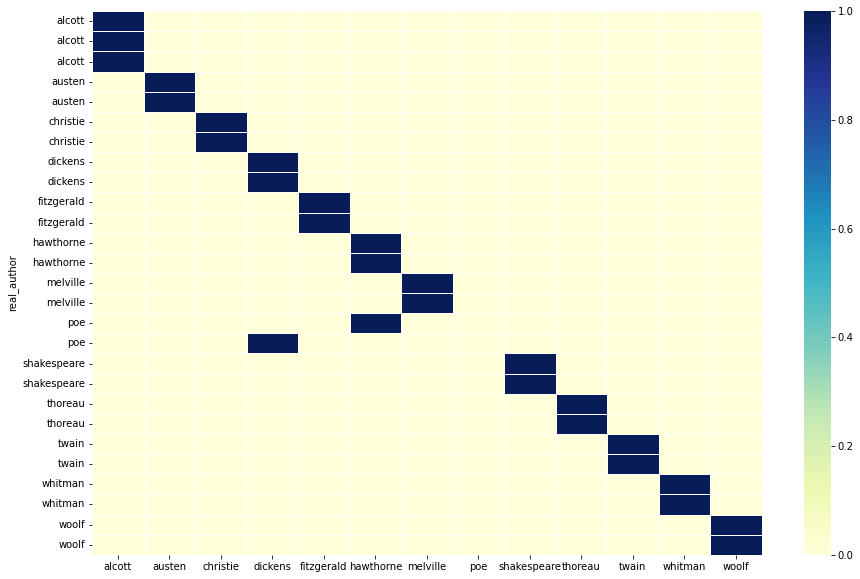

In [23]:
df = prediction_heatmap(X_test, y_test,author_dict, vectorizer, classifier)

If you have a look at the df, you will see for each author the probability that she/he has written a specific book. In the last columns there are author_1,2,3 which describe the first, second and third more likely matches, then there's the real author and the last two columns indicate:

* if there's a perfect match (the first one = real author);
* if the match with the real author is still in the first three matches.

In [24]:
df.head()

,alcott,austen,christie,dickens,fitzgerald,hawthorne,melville,poe,shakespeare,thoreau,twain,whitman,woolf,author_1,author_2,author_3,real_author,is_right,is_in_top3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alcott,woolf,whitman,alcott,True,True
22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alcott,woolf,whitman,alcott,True,True
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alcott,woolf,whitman,alcott,True,True
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,austen,woolf,whitman,austen,True,True
25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,austen,woolf,whitman,austen,True,True


But, let me see, you're wondering "Hey, I requested a SPECIFIC test file 😪 when can I see the predicted author?". Heeeere we go ✨

In [26]:
author, title, _, author_pred = predict_author_from_test_path(TEST_FILE_PATH,author_dict, vectorizer, classifier)
print("Author: "+author)
print("Title: "+title)
print("Predicted author: "+convert_label_to_complete_name([author_pred])[0])

Author: Mark Twain (Samuel Clemens)
Title: Life On The Mississippi, Complete
Predicted author: Mark Twain


Seems to work 🤓
You know, you can also get the list of probabilities (sorted by the most likely author) that a person has written the book you requested: 

In [27]:
preds, message = predict_top_3_authors(TEST_FILE_PATH,
                      author_dict, vectorizer, classifier, is_path=True)
print(message)

Authors that most likely have written the requested book:
Author      Probability
--------  -------------
twain                 1
